# 'timeit' Function

In [280]:
import time
# Function to help us get the running time
def timeit(func):
    """
    A decorator that times the function func with the arguments that
    are passed to it
    :param func: Function being timed
    :return: func's result
    """
    def clocked(*args, **kwargs):
        t0 = time.perf_counter()
        result = func(*args, **kwargs)
        elapsed = time.perf_counter() - t0
        name = func.__name__
        #print('[%0.8fs] %s' % (elapsed, name))
        return result, elapsed
    return clocked

# Class Graph to allow us to implement graphs 

In [387]:
from typing import TypeVar, List, Dict, Tuple
T = TypeVar("T")

# This class was done in our algorithm class (CS362). We added some modifications
class Graph:
    """
    An undirected Graph with adjacency lists (dictionary)
    """

    def __init__(self):
        """
        Constructor
        """
        self._vertices: Dict[T, List[T]] = { }
        self._edges: List[Tuple[T,T,int]] = [ ]

    def add_edge(self, v: T, u: T) -> None:
        """
        Add an edge between v and u to the graph
        """
        if v not in self._vertices:
            self._vertices[v] = []
        if u not in self._vertices:
            self._vertices[u] = []
        
        self._vertices[v].append(u)
        self._vertices[u].append(v)
        

    def get_edges(self, v:T):
        """
        Return the list of edges for vertex v 
        """
        return self._vertices[v]
    
    def edge_list(self):
        return self._edges
    
    
    def get_vertices(self) -> List[T]:
        """
        Return the list of the vertices in the graph
        """
        return self._vertices.keys()
    
    def __str__(self):
        """
        Pretty print the adjacency lists of the graph.
        """
        r = ""
        for u in self.get_vertices():
            r += "{0} --> [".format(u)
            for v in self.get_edges(u):
                r+= "{0}, ".format(v)
            r += '{0}{0}]\n'.format(chr(0x8))
        return r

In [388]:
class WeightedGraph(Graph):

    def __init__(self):
        super().__init__()

    def add_edge(self, v:T, u:T, weight: int):
        if v not in self.get_vertices():
            self._vertices[v] = []
        if u not in self._vertices:
            self._vertices[u] = []
        
        self._edges.append((u,v,weight))
        self._vertices[v].append((u, weight))
        self._vertices[u].append((v, weight))

# Building the graph

In [414]:
g = WeightedGraph()
g.add_edge('A', 'B', 4)
g.add_edge('A', 'G', 1)
g.add_edge('A', 'F', 5)
g.add_edge('B', 'G', 8)
g.add_edge('B', 'D', 2)
g.add_edge('B', 'C', 5)
g.add_edge('C', 'D', 4)
g.add_edge('C', 'E', 1)
g.add_edge('D', 'E', 3)
g.add_edge('D', 'F', 7)
g.add_edge('E', 'F', 4)
g.add_edge('F', 'G', 3)

In [390]:
from Heap import heap
from typing import Tuple, Dict, TypeVar, List
T = TypeVar("T")

# Kruskal's Algorithm

In [424]:
# For this code we used the book "Algorithm" by Sanjoy Dasgupta, Christos Papadimitriou, and Umesh Vazirani
# Pages 140-150
@timeit
def kruskal(g: WeightedGraph) -> List[List]:
    
    # This function creates 2 dictionaries to keep count of rank and also the parent(root) of each set
    def makeset(parents: Dict, rank: Dict) -> Tuple[Dict, Dict]:
        for vertex in g.get_vertices():
            parents[vertex] = vertex
            rank[vertex] = 0
        return (parents, rank)
    
    # Function 'find' checks and finds if the set of that particular set(parents)
    # We also use this function to see if two vertices are from the same set(parents) to not connect them
    # because that would create a cycle
    def find(parents: Dict, vert: T):       
        if parents[vert] != vert:
            return find(parents, parents[vert])
        return vert
          
    # This function connects the two trees to each other by making the
    def union(parents: Dict, rank: Dict, u: T, v: T):        
        # getting the root of each tree
        root_u = find(parents, u)
        root_v = find(parents, v)       
        # Compare the rank of each tree to see which one is shorter and then make the root
        # of the shorter tree point to the root of the taller tree(Because it would result in better efficiency)
        # If they are the same we just increase the rank and merge them
        if rank[root_u] > rank[root_v]:
            parents[root_v] = root_u
        elif rank[root_u] < rank[root_v]:
            parents[root_u] = root_v
        else:
            parents[root_v] = root_u
            rank[root_u] += 1
            
    parents, rank = makeset({},{})
    
    # Sort the edges from smallest to biggest
    edges = g.edge_list()
    edges = sorted(edges, key = lambda x: x[2])
    
    # Variable result, to store the minimum spanning tree
    result = [] 
    
    # Counter to go through all the edges in the graph
    i = 0
    
    # Variable to end the loop once we have p - 1 edges (p being the number of vertices in the original graph)
    num_edge = 0 
    
    # This loop runs until there are p - 1 edges
    while num_edge < len(g.get_vertices()) - 1:
        
        # Saving the vertices and the weight of the graph in these variables
        u = edges[i][0]
        v = edges[i][1]
        w = edges[i][2]
        
        # Finding the root of each vertex(belongs to which set/tree)
        parent_u = find(parents, u)
        parent_v = find(parents, v)
        
        # If both vertices are not from the same set(tree) we connect them
        if parent_u != parent_v:
            num_edge = num_edge + 1
            # Add the edge to the result
            result.append([u, v, w])
            # use the union function to connect the edge to the tree
            union(parents, rank, u, v)
            
        i+=1
        
    return result

## Print the output nicely

In [427]:
krus_mst = kruskal(g)[0]
# Varibale to save the weight of the minimum spanning tree
mst_weight = 0
count = 1
for u, v, wt in krus_mst:
    mst_weight += wt
    print ("Edge {0}: {1} {2} --> weight ({3})".format(count,u,v,wt))
    count += 1

print("Total weight of MST = {0}".format(mst_weight))

Edge 1: G A --> weight (1)
Edge 2: E C --> weight (1)
Edge 3: D B --> weight (2)
Edge 4: E D --> weight (3)
Edge 5: G F --> weight (3)
Edge 6: B A --> weight (4)
Total weight of MST = 14


# Prim's Algorithm

In [429]:
Prev = Dict[T, Tuple[T, float]]

# In prim's algoritm it is required to provide a starting vertex
# This algorithm was done in our algorithm class (CS362)
@timeit
def prim(g: WeightedGraph, start: T) -> Prev:
    prev = dict()
    visited = dict() # keep us from creating cycles
    h = heap()  # heap of edges

    # for each vertex connected to v that is not visited
    # add the edge to the heap.
    def visit(v : T):
        visited[v] = True
        for (z, w) in g.get_edges(v):
            if z not in visited:
                h.insert((v, z), w)   

    visit(start)
    while len(h._h) > 0:
        (c, (v,z)) = h.delete_root() # delete the lowest cost edge
        if z in visited:
            continue

        visit(z)
        prev[z] = (v, c)
    return prev

## Print the output nicely

In [430]:
prim_mst = prim(g,"A")[0]
count = 1
weight = 0
for key in prim_mst:
    
    weight += prim_mst[key][1]
    print ("Edge {0}: {1} {2} --> weight ({3})".format(count, key, prim_mst[key][0], prim_mst[key][1]))
    count += 1

print("Total weight of MST = {0}".format(weight))
    

Edge 1: G A --> weight (1)
Edge 2: F G --> weight (3)
Edge 3: B A --> weight (4)
Edge 4: D B --> weight (2)
Edge 5: E D --> weight (3)
Edge 6: C E --> weight (1)
Total weight of MST = 14


# Running each algorithm on different graphs with different sizes

In [406]:
ts_krus = [] # list of times 

# Create 49 different graphs starting with 10 vertices up to 490 vertices(they are all complete graphs)
for n in range(10, 500, 10):
    g = WeightedGraph()
    for i in range (n):
        for j in range(i+1,n):
            g.add_edge(i,j,random.randrange(1,n))
    (x, t) = kruskal(g)
    ts_krus.append(t)

print(ts_krus)

[6.104697240516543e-05, 0.0001639010151848197, 0.0002866240101866424, 0.0005551529466174543, 0.0006169740227051079, 0.0011076649534516037, 0.0051668050000444055, 0.003501651983242482, 0.0072330000111833215, 0.004330936004407704, 0.0022228609886951745, 0.003355750988703221, 0.0026052180328406394, 0.002806365955621004, 0.0056755709811113775, 0.004447537008672953, 0.005171719996724278, 0.005146202980540693, 0.0074591339798644185, 0.007480908010620624, 0.00911497202469036, 0.00784383900463581, 0.007850405992940068, 0.009523632004857063, 0.010954272001981735, 0.011969939048867673, 0.011229609022848308, 0.013517672952730209, 0.015043538995087147, 0.01620837301015854, 0.017645467014517635, 0.01725666201673448, 0.017850829986855388, 0.018716114980634302, 0.020987696014344692, 0.022494415985420346, 0.02337268105475232, 0.024756440019700676, 0.029216123977676034, 0.03143902600277215, 0.030765670991968364, 0.03515351202804595, 0.03408155799843371, 0.03865945996949449, 0.043663658027071506, 0.0429

In [259]:
import random

ts_prim = [] # list of times 

# Create 49 different graphs starting with 10 vertices up to 490 vertices(they are all complete graphs)
for n in range(10, 500, 10):
    g = WeightedGraph()
    for i in range (n):
        for j in range(i+1,n):
            g.add_edge(i,j,random.randrange(1,n))
    (x, t) = prim(g,0)
    ts_prim.append(t)
print(ts_prim)

[0.0008032370242290199, 0.012533425004221499, 0.028805381036363542, 0.023896283993963152, 0.027545464981812984, 0.051077743992209435, 0.05377599602798, 0.07582940999418497, 0.10231142200063914, 0.11082255694782361, 0.1332233879948035, 0.16178308299276978, 0.20009951398242265, 0.23622072499711066, 0.2803124660276808, 0.32463898800779134, 0.364710696041584, 0.4129139959695749, 0.47474882297683507, 0.5374792970251292, 0.604279374005273, 0.6729257749975659, 0.7385737030417658, 0.811636325030122, 0.887970446026884, 0.9692598140100017, 1.0585713670006953, 1.1601942660054192, 1.242327898973599, 1.3567204739665613, 1.4629140620236285, 1.5477427020086907, 1.678213645995129, 1.8153282579733059, 1.9185116240405478, 2.0212035109871067, 2.156616136955563, 2.265800450986717, 2.4007803929853253, 2.5498629339854233, 2.700255648989696, 2.8817214260343462, 2.991064600995742, 3.196648960991297, 3.3344675640109926, 3.536609808972571, 3.653301225975156, 3.8410270219901577, 4.13104663399281]


# Kruskal's Algorithm Running Time

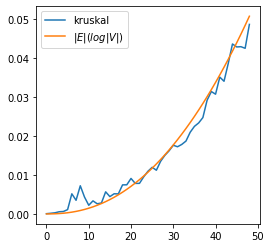

In [411]:
import numpy as np
import math
import matplotlib.pyplot as plt
fig = plt.figure("Class Demo", figsize=(4,4))
# We devide it by 2500 because of the constants.(it's to better scale it to the points we got through running the program)
g = [(math.log(x,2)*(x*(x-1)/2))/130000 for x in range(1,50) ]

ax = fig.add_subplot(111)
ax.plot(ts_krus, label="kruskal")
ax.plot(g, label=r"$|E|(log |V|)$")
ax.legend()

# Prim's Algorithm Running Time

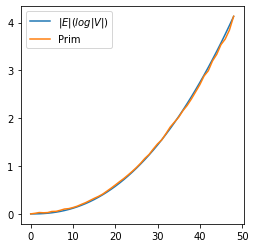

In [361]:
import numpy as np
import math
import matplotlib.pyplot as plt

fig = plt.figure("Class Demo", figsize=(4,4))
# We devide it by 2500 because of the constants.(it's to better scale it to the points we got through running the program)
g = [(math.log(x,2)*(x*(x-1)/2))/1600 for x in range(1,50) ]
ax = fig.add_subplot(111)
ax.plot(g, label=r"$|E|(log |V|)$")
ax.plot(ts_prim, label="Prim")
ax.legend()